# Startup in India analysis
## Mohammed Hasan
## 17070122044

In [18]:
library(readr)
library(dplyr)
library(ggplot2)
library(tidyverse)
library(data.table)
library(plyr) #Data manipulation
library(dplyr) #Data Manipulation
library(tidyr) #Data reading
library(splitstackshape) #Column Split
library(ggplot2) #Data visualisation
library(ggthemes) #Themes
library(kableExtra) #Data Table
library(knitr)# Data Table
library(cowplot) #Multiplot
library(stringr) #String manipulation
#library(zoo) # Time & Date manipulation

library(ggrepel) 
library(forcats)

Warning message:
"package 'ggrepel' was built under R version 3.6.3"

In [24]:
startup <- read.csv("funding.csv",header=TRUE,stringsAsFactors = FALSE)

In [25]:
head(startup)


ï..Sr.No,Date.dd.mm.yyyy,Startup.Name,Industry.Vertical,SubVertical,City..Location,Investors.Name,InvestmentnType,Amount.in.USD,Remarks
1,09/01/2020,BYJUâ€™S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",
6,13/01/2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",


In [26]:
summary(startup)

    ï..Sr.No      Date.dd.mm.yyyy    Startup.Name       Industry.Vertical 
 Min.   :   1.0   Length:3044        Length:3044        Length:3044       
 1st Qu.: 761.8   Class :character   Class :character   Class :character  
 Median :1522.5   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1522.5                                                           
 3rd Qu.:2283.2                                                           
 Max.   :3044.0                                                           
 SubVertical        City..Location     Investors.Name     InvestmentnType   
 Length:3044        Length:3044        Length:3044        Length:3044       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
             

In [31]:
nrow(startup)

[1] 3044

In [35]:
colnames(startup)


[1] "ï..Sr.No"          "Date.dd.mm.yyyy"   "Startup.Name"     
 [4] "Industry.Vertical" "SubVertical"       "City..Location"   
 [7] "Investors.Name"    "InvestmentnType"   "Amount.in.USD"    
[10] "Remarks"

## Investment type Value cleaning

In [ ]:
for (i in 1:nrow(startup)){
    print(i)
if(grepl("Seed", startup$InvestmentnType[i], fixed = TRUE) && grepl("Angel", startup$InvestmentnType[i], fixed = TRUE)){
    startup$InvestmentnType[i] = "SAF"
    print(startup$InvestmentnType[i])
    print(i)
}
if(grepl("Seed" , startup$InvestmentnType[i]) && grepl("Funding", startup$InvestmentnType[i])){
    startup$InvestmentnType[i] = "Seed Funding"
     print(startup$InvestmentnType[i])
     print(i)
}
if(grepl("Private" , startup$InvestmentnType[i]) && grepl("Equity" , startup$InvestmentnType[i])){
    startup$InvestmentnType[i] = "Private Equity"
     print(startup$InvestmentnType[i])
     print(i)
}}

In [115]:
t <- startup %>% dplyr::group_by(InvestmentnType) %>% dplyr::summarise(n = n()) %>% arrange(desc(n)) %>% head(n = 10)

In [116]:
t

InvestmentnType,n
Seed Funding,1389
Private Equity,1362
SAF,138
Debt Funding,25
Series A,24
Series B,20
Series C,14
Series D,12
Seed Round,7
Pre-Series A,4


In [117]:
glimpse(startup)

Observations: 3,044
Variables: 10
$ ï..Sr.No          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15...
$ Date.dd.mm.yyyy   <chr> "09/01/2020", "13/01/2020", "09/01/2020", "02/01/...
$ Startup.Name      <chr> "BYJUâ\200\231S", "Shuttl", "Mamaearth", "https:/...
$ Industry.Vertical <chr> "E-Tech", "Transportation", "E-commerce", "FinTec...
$ SubVertical       <chr> "E-learning", "App based shuttle service", "Retai...
$ City..Location    <chr> "Bengaluru", "Gurgaon", "Bengaluru", "New Delhi",...
$ Investors.Name    <chr> "Tiger Global Management", "Susquehanna Growth Eq...
$ InvestmentnType   <chr> "Private Equity", "Series C", "Series B", "Pre-se...
$ Amount.in.USD     <chr> "20,00,00,000", "80,48,394", "1,83,58,860", "30,0...
$ Remarks           <chr> "", "", "", "", "", "", "", "", "", "", "", "", "...


## Convert Date string to day,month,year & Year_month

In [118]:
startup$date <- as.POSIXct(strptime(startup$Date, format = "%d/%m/%Y"))
startup$day <- as.integer(format(startup$date, "%d")) # day
startup$month <- as.factor(format(startup$date, "%m")) # month
startup$year <- as.integer(format(startup$date, "%y")) # day
startup$monthyear <- paste(startup$year,startup$month,sep="_")# year month

In [119]:
head(startup)

ï..Sr.No,Date.dd.mm.yyyy,Startup.Name,Industry.Vertical,SubVertical,City..Location,Investors.Name,InvestmentnType,Amount.in.USD,Remarks,date,day,month,year,monthyear
1,09/01/2020,BYJUâ€™S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity,"20,00,00,000",,2020-01-09,9,01,20,20_01
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",,2020-01-13,13,01,20,20_01
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",,2020-01-09,9,01,20,20_01
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",,2020-01-02,2,01,20,20_01
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",,2020-01-02,2,01,20,20_01
6,13/01/2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",,2020-01-13,13,01,20,20_01


## Text cleaning for  startup names 

In [161]:
startup$Startup.Name <- gsub("[[:punct:]]", "",startup$Startup.Name )
startup$Startup.Name <- iconv(startup$Startup.Name, from = 'UTF-8', to = 'ASCII//TRANSLIT')
startup$Startup.Name <- gsub("https ", "",startup$Startup.Name )
startup$Startup.Name <- gsub("  xe2  x80  x99", "",startup$Startup.Name )
startup$Startup.Name <- gsub(" xc2  xa0", "",startup$Startup.Name )
startup$Startup.Name <- gsub(" co", "",startup$Startup.Name )

In [162]:
unique(startup$Startup.Name)

[1] "BYJUS"                                            
   [2] "Shuttl"                                           
   [3] "Mamaearth"                                        
   [4] "  wealthbucket "                                  
   [5] "Fashor"                                           
   [6] "Pando"                                            
   [7] "Zomato"                                           
   [8] "Ecozen"                                           
   [9] "CarDekho"                                         
  [10] "DhruvaSpace"                                      
  [11] "Rivigo"                                           
  [12] "Healthians"                                       
  [13] "Licious"                                          
  [14] "InCred"                                           
  [15] "Trell"                                            
  [16] "Rein Games"                                       
  [17] "Lenskart"                                         
  [18] "Freshworks"                                       
  [19] "Misters"                                          
  [20] "Sunstone Eduversity Pvt  Ltd"                     
  [21] "BurgerSingh"                                      
  [22] "Ninjacart"                                        
  [23] "Aye Finance"                                      
  [24] "SuperGaming"                                      
  [25] "Clumio"                                           
  [26] "eBikeGo"                                          
  [27] "Digital Mall Asia"                                
  [28] "Medikabazaar"                                     
  [29] "Vogo Automotive"                                  
  [30] "FurtadoSchool of Music"                           
  [31] "Paytm"                                            
  [32] "Dunzo"                                            
  [33] "Udaan"                                            
  [34] "The Man Company"                                  
  [35] "FPL Technologies"                                 
  [36] "Cashflo"                                          
  [37] "Digital F5"                                       
  [38] "3rdFlix"                                          
  [39] "75F"                                              
  [40] "Myelin Foundry"                                   
  [41] "Atomberg Technology"                              
  [42] "GOQii"                                            
  [43] "Vyapar App"                                       
  [44] "Progcap"                                          
  [45] "MyPetrolPump"                                     
  [46] "Alteria Capital"                                  
  [47] "Pine Labs"                                        
  [48] "Meesho"                                           
  [49] "Cars24"                                           
  [50] "Uniphore"                                         
  [51] "Zendrive"                                         
  [52] "Lo  Foods"                                        
  [53] "Tala"                                             
  [54] "INDwealth"                                        
  [55] "HungerBox"                                        
  [56] "AdmitKard"                                        
  [57] "Mishry Reviews"                                   
  [58] "Grofers"                                          
  [59] "Rapido Bike Taxi"                                 
  [60] "RenewBuy"                                         
  [61] "Atlan"                                            
  [62] "WizCounsel"                                       
  [63] "Ola Cabs"                                         
  [64] "Daalchini Technologies"                           
  [65] " BYJUS "                                          
  [66] "Moglix"                                           
  [67] "Ezyhaul"                                          
  [68] "InduOS"                                   

In [140]:
startup <- startup %>% drop_na(Startup.Name, Industry.Vertical, Amount.in.USD, City..Location)

In [141]:
dim(startup)

[1] 3044   15

In [145]:
duplicated(startup)[duplicated(startup) == TRUE]

logical(0)

In [156]:
class(startup$Amount.in.USD)

[1] "character"

In [271]:
length(startup$Amount.in.USD[startup$Amount.in.USD == 'N/A'])

[1] 0

## Row removal of N/A, null and empty values from independent variables

In [183]:
d <-startup %>% 
    mutate_all(~ifelse(. %in% c("N/A", "null", ""), NA, .)) %>% 
    na.omit()

In [172]:
startup$Remarks <- NULL

In [190]:
count(d$SubVertical[d$SubVertical == "nan"])

x,freq
nan,646


In [191]:
count(d$Industry.Vertical[d$Industry.Vertical == "nan"])

x,freq
nan,129


In [192]:
count(d$City..Location	[d$City..Location	 == "nan"])

x,freq
nan,129


In [215]:
startup <-startup %>% 
    mutate_all(~ifelse(. %in% c("N/A", "null", ""), NA, .)) %>% 
    na.omit()

## Conversion of Amount to Numeric 

In [195]:

startup$Amount.in.USD <- gsub("[^0-9.-]", "",startup$Amount.in.USD )

In [219]:
startup$Amount.in.USD<-as.numeric(startup$Amount.in.USD) 

In [220]:
length(startup$Amount.in.USD)

[1] 2044

In [222]:
head(startup)

ï..Sr.No,Date.dd.mm.yyyy,Startup.Name,Industry.Vertical,SubVertical,City..Location,Investors.Name,InvestmentnType,Amount.in.USD,date,day,month,year,monthyear
1,09/01/2020,BYJUS,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity,200000000,1578517200,9,1,20,20_01
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,1578862800,13,1,20,20_01
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,1578517200,9,1,20,20_01
4,02/01/2020,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,1577912400,2,1,20,20_01
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,1577912400,2,1,20,20_01
6,13/01/2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,9000000,1578862800,13,1,20,20_01


## Start-up Funding between 2015-2020  

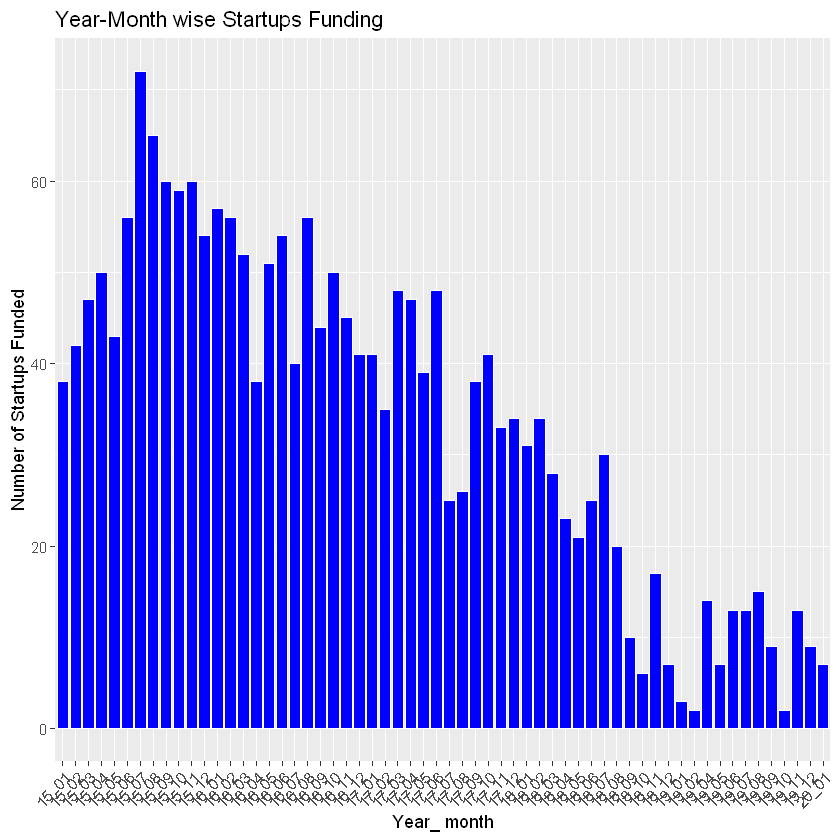

In [286]:
startup %>%
    dplyr::group_by(monthyear)%>%
    dplyr::summarise(n = n())%>%
    drop_na(monthyear)%>%
    ggplot(aes(x =monthyear, y =  n )) +
    geom_bar(stat='identity',colour="white", fill = c("blue"))+
    labs(x = 'Year_ month', y = 'Number of Startups Funded', title = 'Year-Month wise Startups Funding') +
    theme(axis.text.x=element_text(angle=45,hjust=1,vjust=1))

## Industry vertical categories 

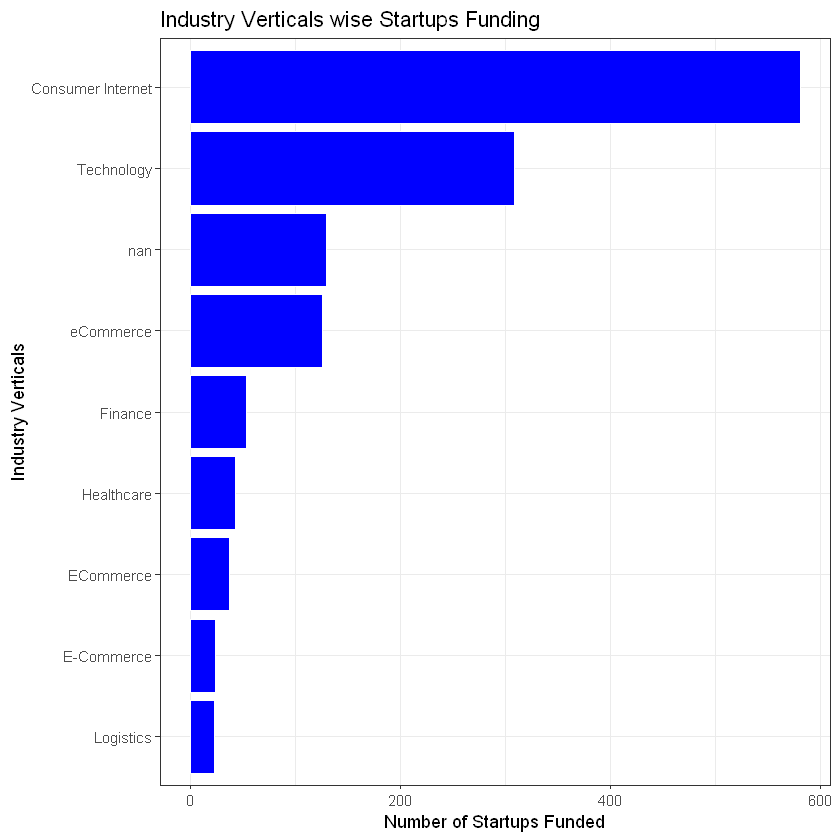

In [285]:
temp<-startup %>%
    dplyr::group_by(Industry.Vertical)%>%
    dplyr::summarise(n = n()) %>%
    drop_na(Industry.Vertical)%>%
    arrange(desc(n)) %>%
    head(n = 9)

temp %>%
    ggplot(aes(x = reorder(Industry.Vertical , n) , y = n)) +
    geom_bar(stat='identity',colour="white", fill = c("blue")) +
    labs(x = 'Industry Verticals', y = 'Number of Startups Funded', title = 'Industry Verticals wise Startups Funding') +
    coord_flip() + 
    theme_bw()

## Prefered CityLocation for startups categories 

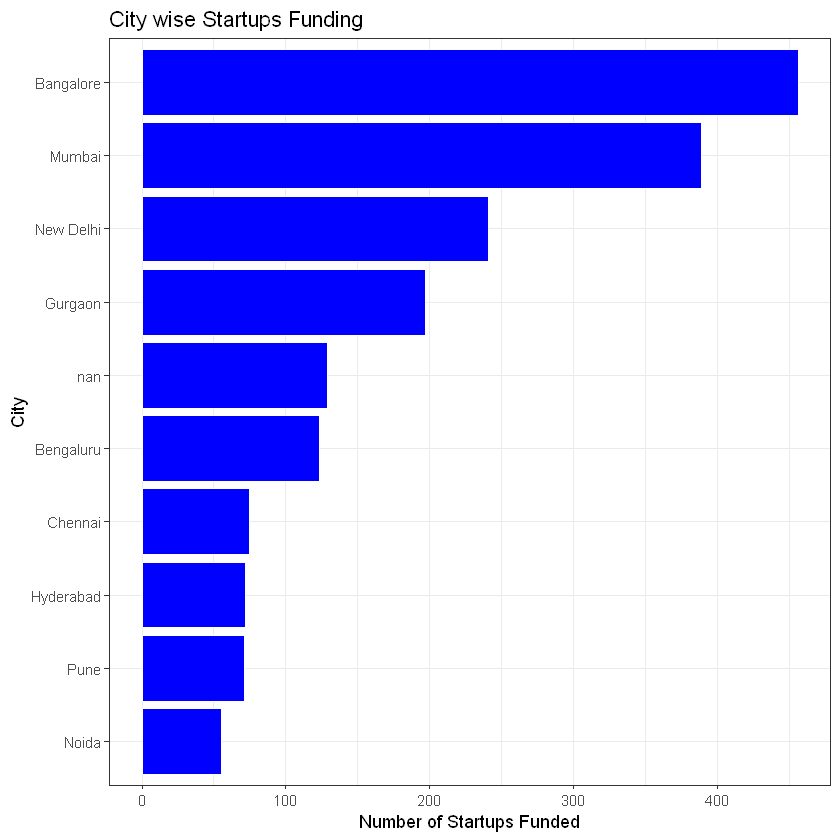

In [284]:
temp <-startup %>%
    dplyr::group_by(City..Location)%>%
    dplyr::summarise(n = n())%>%
    drop_na(City..Location)%>%
    arrange(desc(n)) %>%
    head(n = 10)
    
temp %>%    
    ggplot(aes(x =reorder(City..Location,n), y =  n )) +
    geom_bar(stat='identity',colour="white", fill = c("blue")) +
    labs(x = 'City', y = 'Number of Startups Funded', title = 'City wise Startups Funding') +
    coord_flip() + 
    theme_bw()

## Inversters type categories 

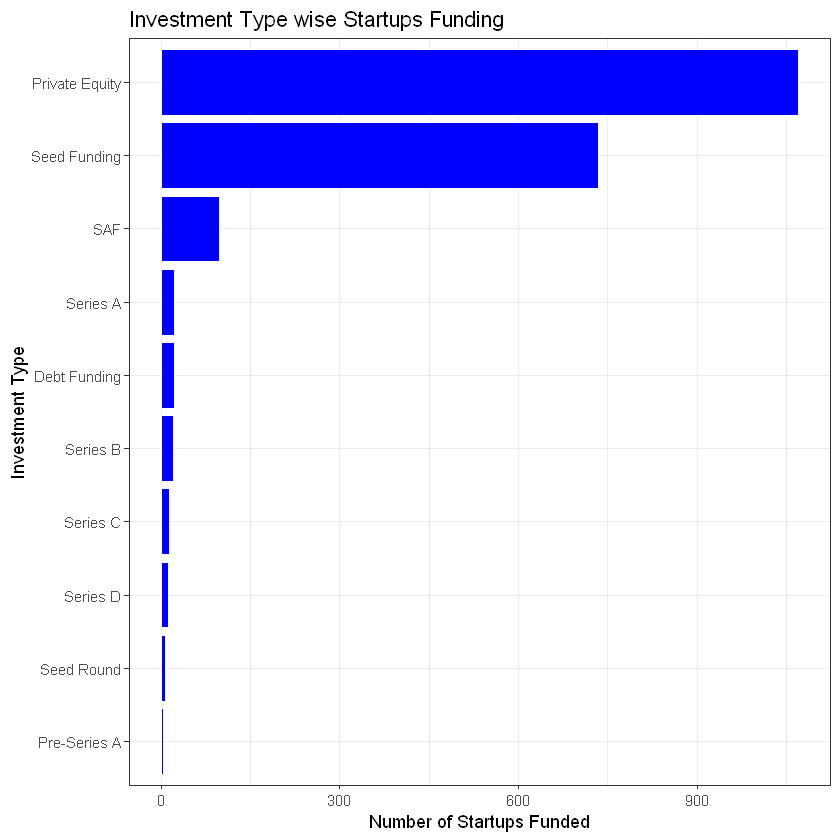

In [283]:
temp<- startup %>%
    dplyr::group_by(InvestmentnType)%>%
    dplyr::summarise(n = n())%>%
    arrange(desc(n)) %>%
    head(n = 10)
    
temp %>%      
    ggplot(aes(x = reorder(InvestmentnType,n) , y =  n )) +
    geom_bar(stat='identity',colour="white", fill = c("blue")) +
    labs(x = 'Investment Type', y = 'Number of Startups Funded', title = 'Investment Type wise Startups Funding') +
    coord_flip() + 
    theme_bw()

In [235]:
startup$Startup.Name <- tolower(startup$Startup.Name)

In [236]:
startup$Startup.Name[startup$Startup.Name == "olacabs"] <- "ola"
startup$Startup.Name[startup$Startup.Name == "oyo"] <- "oyo rooms"
startup$Startup.Name[startup$Startup.Name == "oyorooms"] <- "oyo rooms"

## Which start-up is funded more 

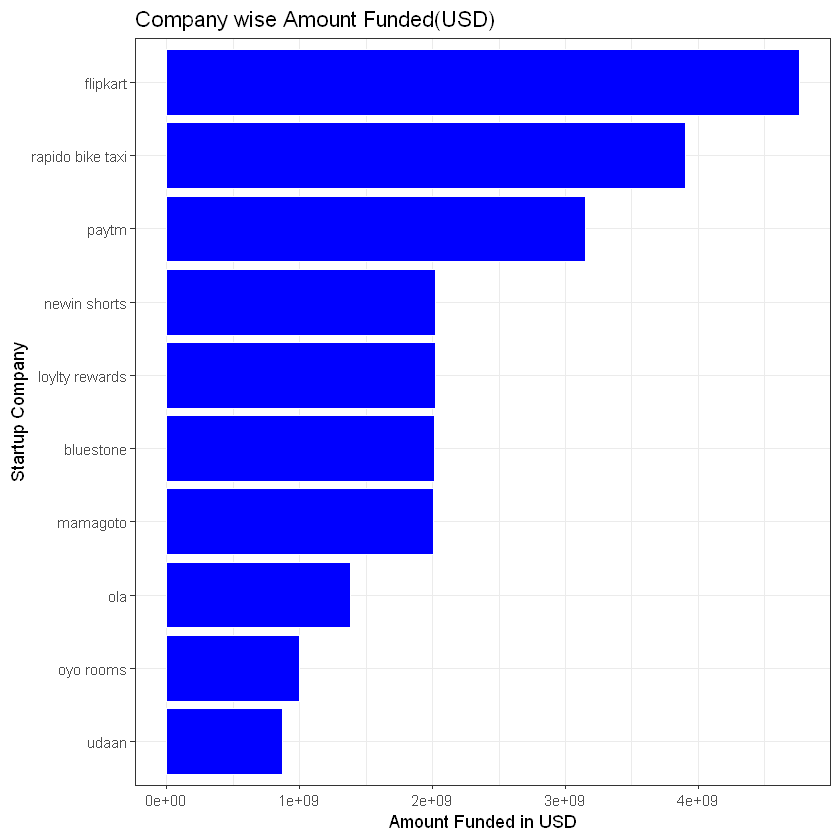

In [282]:
temp<- startup %>%
    dplyr::group_by(Startup.Name)%>%
    dplyr::summarise(n = sum(Amount.in.USD))%>%
    arrange(desc(n)) %>%
    head(n = 10)

temp %>%      
    ggplot(aes(x = reorder(Startup.Name,n) , y =  n )) +
    geom_bar(stat='identity',colour="white", fill = c("blue")) +
    labs(x = 'Startup Company', y = 'Amount Funded in USD', title = 'Company wise Amount Funded(USD)  ') +
    coord_flip() + 
    theme_bw()

## Which start-up is funded again and again 

Startup.Name,n
oyo rooms,9
swiggy,8
ola cabs,7
blackbuck,6
flipkart,6
lendingkart,6
toppr,6
aye finance,5
byjus,5
capital float,5


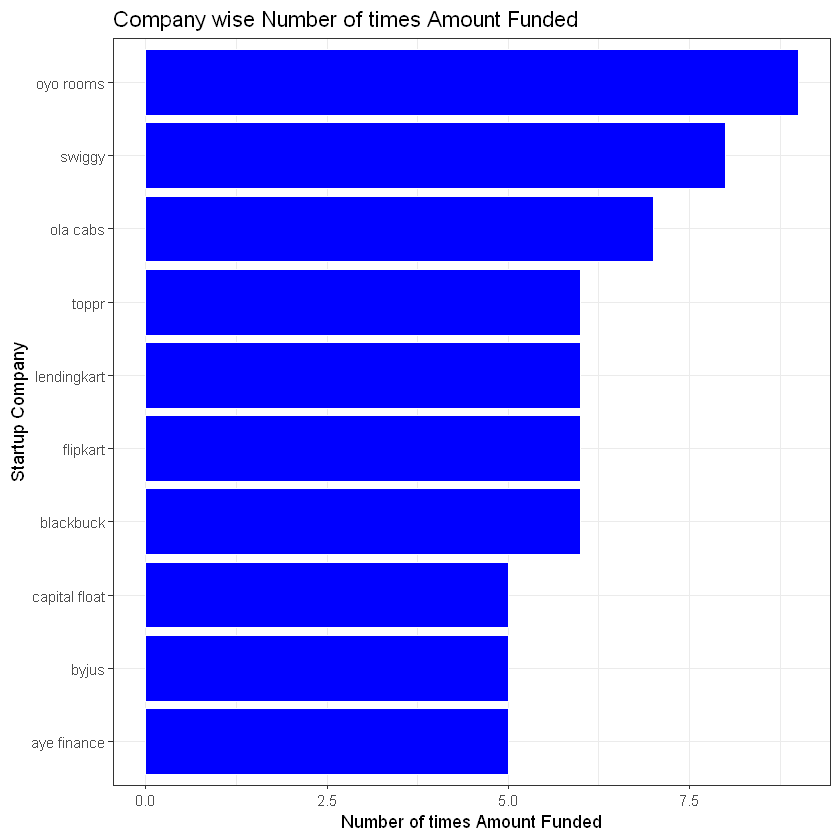

In [281]:
temp<- startup %>%
    dplyr::group_by(Startup.Name)%>%
    dplyr::summarise(n = n())%>%
    arrange(desc(n)) %>%
    head(n = 10)
    
head(temp,10)
    
temp %>%      
    ggplot(aes(x = reorder(Startup.Name,n) , y =  n )) +
    geom_bar(stat='identity',colour="white", fill = c("blue")) +
    labs(x = 'Startup Company', y = 'Number of times Amount Funded', title = 'Company wise Number of times Amount Funded ') +
    coord_flip() + 
    theme_bw()

## WordCloud 

Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
"transformation drops documents"

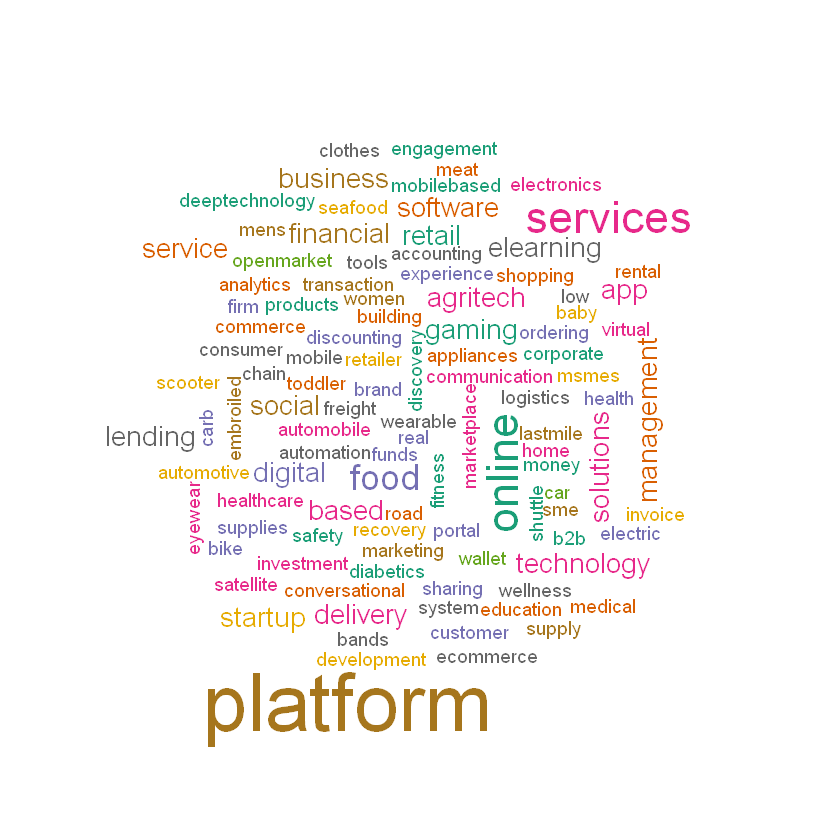

In [280]:
library(tm)
library(wordcloud)
library(RColorBrewer)
makeWordCloud <- function(documents) {
  corpus = Corpus(VectorSource(tolower(documents)))
  corpus = tm_map(corpus, removePunctuation)
  corpus = tm_map(corpus, removeWords, stopwords("english"))
  
  frequencies = DocumentTermMatrix(corpus)
  word_frequencies = as.data.frame(as.matrix(frequencies))
  
  words <- colnames(word_frequencies)
  freq <- colSums(word_frequencies)
  wordcloud(words, freq,
            min.freq=sort(freq, decreasing=TRUE)[[100]],
            colors=brewer.pal(8, "Dark2"),
            random.color=TRUE) 
}  


makeWordCloud(startup[["SubVertical"]][1:50])

In [267]:
library(splitstackshape)

startup2 <- cSplit(startup, "Investors.Name", ",", 'long', drop = FALSE)

head(startup2)

ï..Sr.No,Date.dd.mm.yyyy,Startup.Name,Industry.Vertical,SubVertical,City..Location,Investors.Name,InvestmentnType,Amount.in.USD,date,day,month,year,monthyear
1,09/01/2020,byjus,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity,200000000,1578517200,9,1,20,20_01
2,13/01/2020,shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,1578862800,13,1,20,20_01
3,09/01/2020,mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,1578517200,9,1,20,20_01
4,02/01/2020,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,1577912400,2,1,20,20_01
5,02/01/2020,fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,1577912400,2,1,20,20_01
6,13/01/2020,pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,9000000,1578862800,13,1,20,20_01


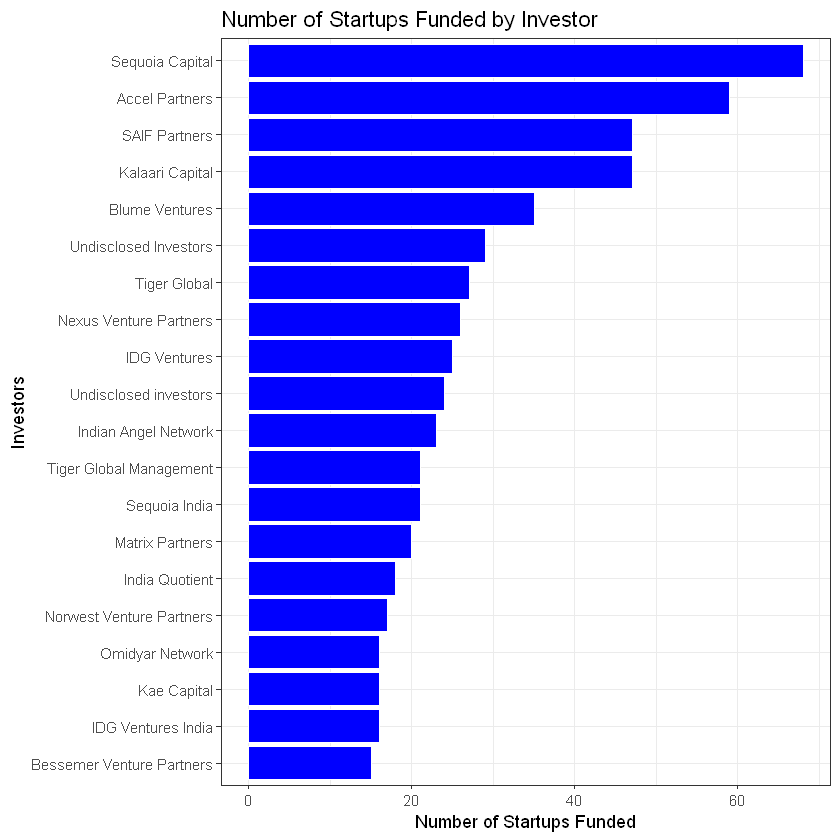

In [278]:
temp<-startup2 %>%
    dplyr::group_by(Investors.Name)%>%
    dplyr::summarise(n = n())%>%
    arrange(desc(n)) %>%
    head(n = 20)

temp %>%      
    ggplot(aes(x = reorder(Investors.Name,n) , y =  n )) +
    geom_bar(stat='identity',colour="white", fill = c("blue")) +
    labs(x = 'Investors', y = 'Number of Startups Funded', title = 'Number of Startups Funded by Investor') +
    coord_flip() + 
    theme_bw()

## Prefered city X IndustryVertical treemap 

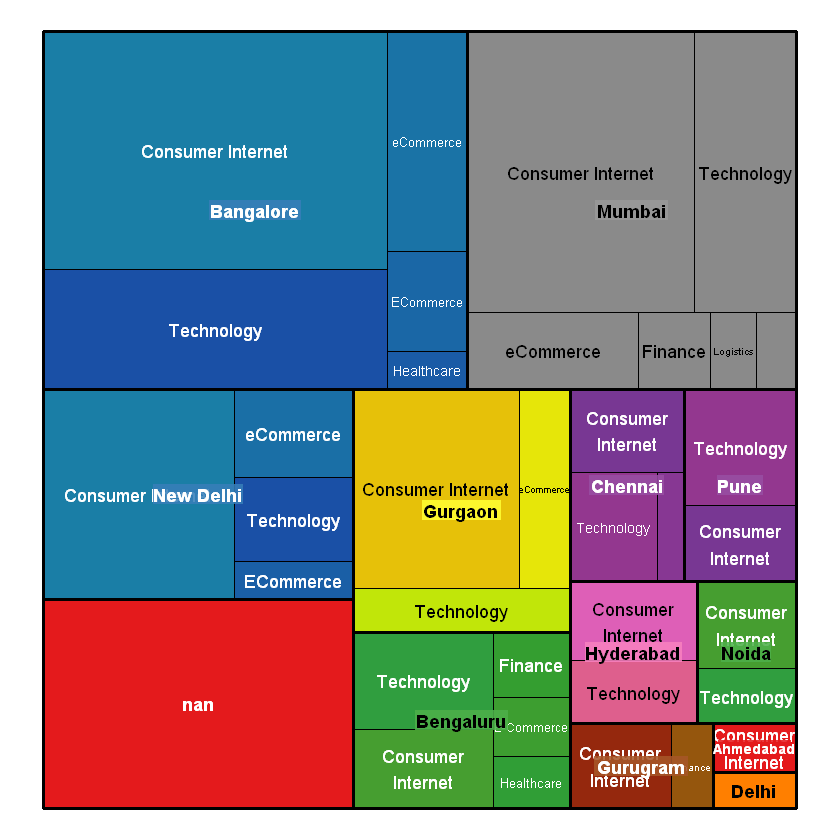

In [277]:

library(treemap)


startup1 <-startup %>%
    select(City..Location, Industry.Vertical) %>%
    dplyr::group_by(City..Location, Industry.Vertical) %>%
    dplyr::summarise(n = n())%>%
    filter(n>5)

treemap(startup1 , index=c( "City..Location" , "Industry.Vertical" ),
        vSize="n",
        title="",
        palette="Set1"
        )  

In [262]:
head(startup)

ï..Sr.No,Date.dd.mm.yyyy,Startup.Name,Industry.Vertical,SubVertical,City..Location,Investors.Name,InvestmentnType,Amount.in.USD,date,day,month,year,monthyear
1,09/01/2020,byjus,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity,200000000,1578517200,9,1,20,20_01
2,13/01/2020,shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,1578862800,13,1,20,20_01
3,09/01/2020,mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,1578517200,9,1,20,20_01
4,02/01/2020,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,1577912400,2,1,20,20_01
5,02/01/2020,fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,1577912400,2,1,20,20_01
6,13/01/2020,pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,9000000,1578862800,13,1,20,20_01


## Top 10 Inverstors name X Industry Vertical - Tree chart 

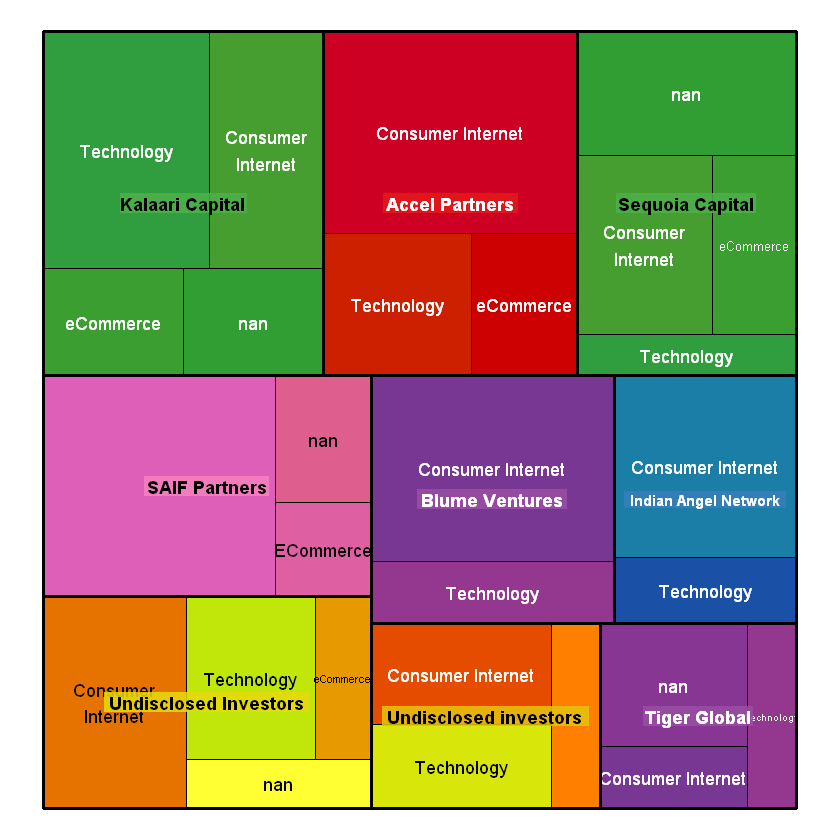

In [276]:
startup3 <-startup2 %>%
    select( Investors.Name , Industry.Vertical)%>%
    dplyr::group_by(Investors.Name ,Industry.Vertical)%>%
    dplyr::summarise(n = n())%>%
    filter(Investors.Name %in% c('Sequoia Capital' ,'Accel Partners','Kalaari Capital','Indian Angel Network','SAIF Partners','Blume Ventures','Undisclosed Investors', 'Ratan Tata','Undisclosed investors','Tiger Global'))%>%
    filter(n>2)
    

treemap(startup3,index=c("Investors.Name","Industry.Vertical"),
        vSize="n",
        title="",
        palette="Set1",
       )